## Department of Computer Science, University of York
### DATA: Introduction to Data Science

## Task 1: Domain Analysis  (5 marks)

Given the business domain and the data overview presented (in the assessment paper), provide a brief description of

* the business problem and its significance to the relevant sector;
* the link between the business problem and the field of data science;
* the main areas of investigation; and
* potential ideas and solutions.


**Word Limit:** 300 words

**Write your answer here (text cell(s) to be used, as appropriate)**

The business problem is the bank’s need for better customer service, customer risk assessment and customer retention across its range of financial services. It currently doesn’t use or analyse the data it collects preventing it from maximising these areas’ growth.
This is of sector significance as most banks provide the same services so a customer’s choice is heavily influenced by which bank provides the best customer service, perks and deals. As it becomes easier to switch banks, customer retention requires more effort and customers need to feel that staying is better than switching. Analysing data the bank already collects is a relatively inexpensive way of making decision-making more effective, accurate, fair and transparent. More effective customer risk assessment will reduce the risk of the bank collapsing.
As the bank provides financial services, a lot of the data is easy to quantify. Data science will make decision-making more effective and accurate as the bank will be able to make decisions that are statistically more likely to have better outcomes. It will also make decision-making more transparent as the bank will be able to identify the exact data used to reach each decision.
Areas of investigation for the bank may include: who joins the bank and why; who stays with or leaves the bank and why; and who is the biggest risk for loans and credit. The bank may wish to prioritise the area where they are most at risk.
Potential ideas for the bank may include targeting more potential customers whose demographic groups are more likely to stay for a long time after joining and targeting retention rewards at demographics who are more likely to leave the bank soon. They could  provide more financial education resources to customers whose demographic groups are more likely to be a credit or loan risk.




----
----


## Task 2: Database Design (25 marks)


Having understood the business domain, present a conceptual design in the form of an entity-relationship (ER) model that would be helpful in creating a database for the bank.

The bank data currently exists in the form of a csv file called *BankRecords.csv*, provided on VLE (path given in page 5, assessment paper). This file has all the existing records. The table available in the csv file is unnormalised. The information about its different columns is given in Tables 1 and 2 (in the assessment paper).

Following the standard principles of database normalisation, normalise the given table (*BankRecords.csv*) to a database schema that has minimum redundancies. Then, using the designed schema, create an SQLite database.

Your answer should include the SQL statements needed to accomplish this step. Your submission should also include the created SQLite database file.

Your answer should clearly cover the following:
* Any assumptions you are making about the given scenario;
* The designated keys, existing relationships, and identified functional dependencies;
* The steps followed and justifications for the decisions made.

**World Limit**: 500 words. This limit applies only to the explanations. There is no limit on any associated code/SQL statements or figures.

**Write your answer here (text cell(s) to be used, as appropriate)**

Where the attribute names a1 to a16 have been used, it isn't clear what these are referring to making the data unclear and difficult to interpret. I have therefore decided to rename these for the creation of the normalised database. I have renamed them as follows:

a1: city_id,
a2: city_name,
a3: region,
a4: population,
a5: municipalities_below500,
a6: municipalities_500to2000,
a7: municipalities_2000to10000,
a8: municipalities¬_above10000,
a9: region_areas,
a10: urban_inhabitants,
a11: salary,
a12: unemployment1995,
a13: unemployment1996,
a14: entrepreneurs,
a15: crimes1995,
a16: crimes1996

I am assuming that due to disposition types, one account could be linked to multiple clients. Therefore, to link accounts and clients within a normalised database, I am creating a table consisting of disposition ID, client ID, account ID and disposition type.
I am assuming that partner_account and partner_bank are dependent on trans_id and not each other as it is not clear that different banks can't use the same account IDs.
I am assuming that more than one card can be taken out against the same account.

For the current flat file, as each loan, standing order, transaction and card creates a new record linked to the account, to create a unique identifier the fields account_id, loan_id, order_id, trans_id, disp_id, client_id and card_id must be combined as a composite primary key. This is because an account with two transactions and nothing else would have the same account ID and have the same values for all other IDs (null). This could occur for all IDs other than account meaning the IDs must be combined to create a unique identifier.

The csv file is already in first normal form as there are no multiple values for any attribute for any record. To move it into the second normal form, partial dependencies were removed. This meant separating data depending on which ID it was reliant on. For example, all the data that was determined by the account and not by financial operations or the client was moved into a separate table. This was repeated for loans, standing orders, transactions, dispositions, clients and cards. This meant that all information in a table was determined by the whole primary key rather than part of it. To then move into third normal form, transitive dependencies were removed. The only transitive dependency was the whole city data (originally A1 to A16) being within the client table. Whilst A1 depended on the client ID, all others (A2 to A16) relied only on A1 and were therefore transitively dependent on client ID. A1 to A16 were moved into a separate cities table with A1 becoming the primary key and also remaining in the clients table as a foreign key.

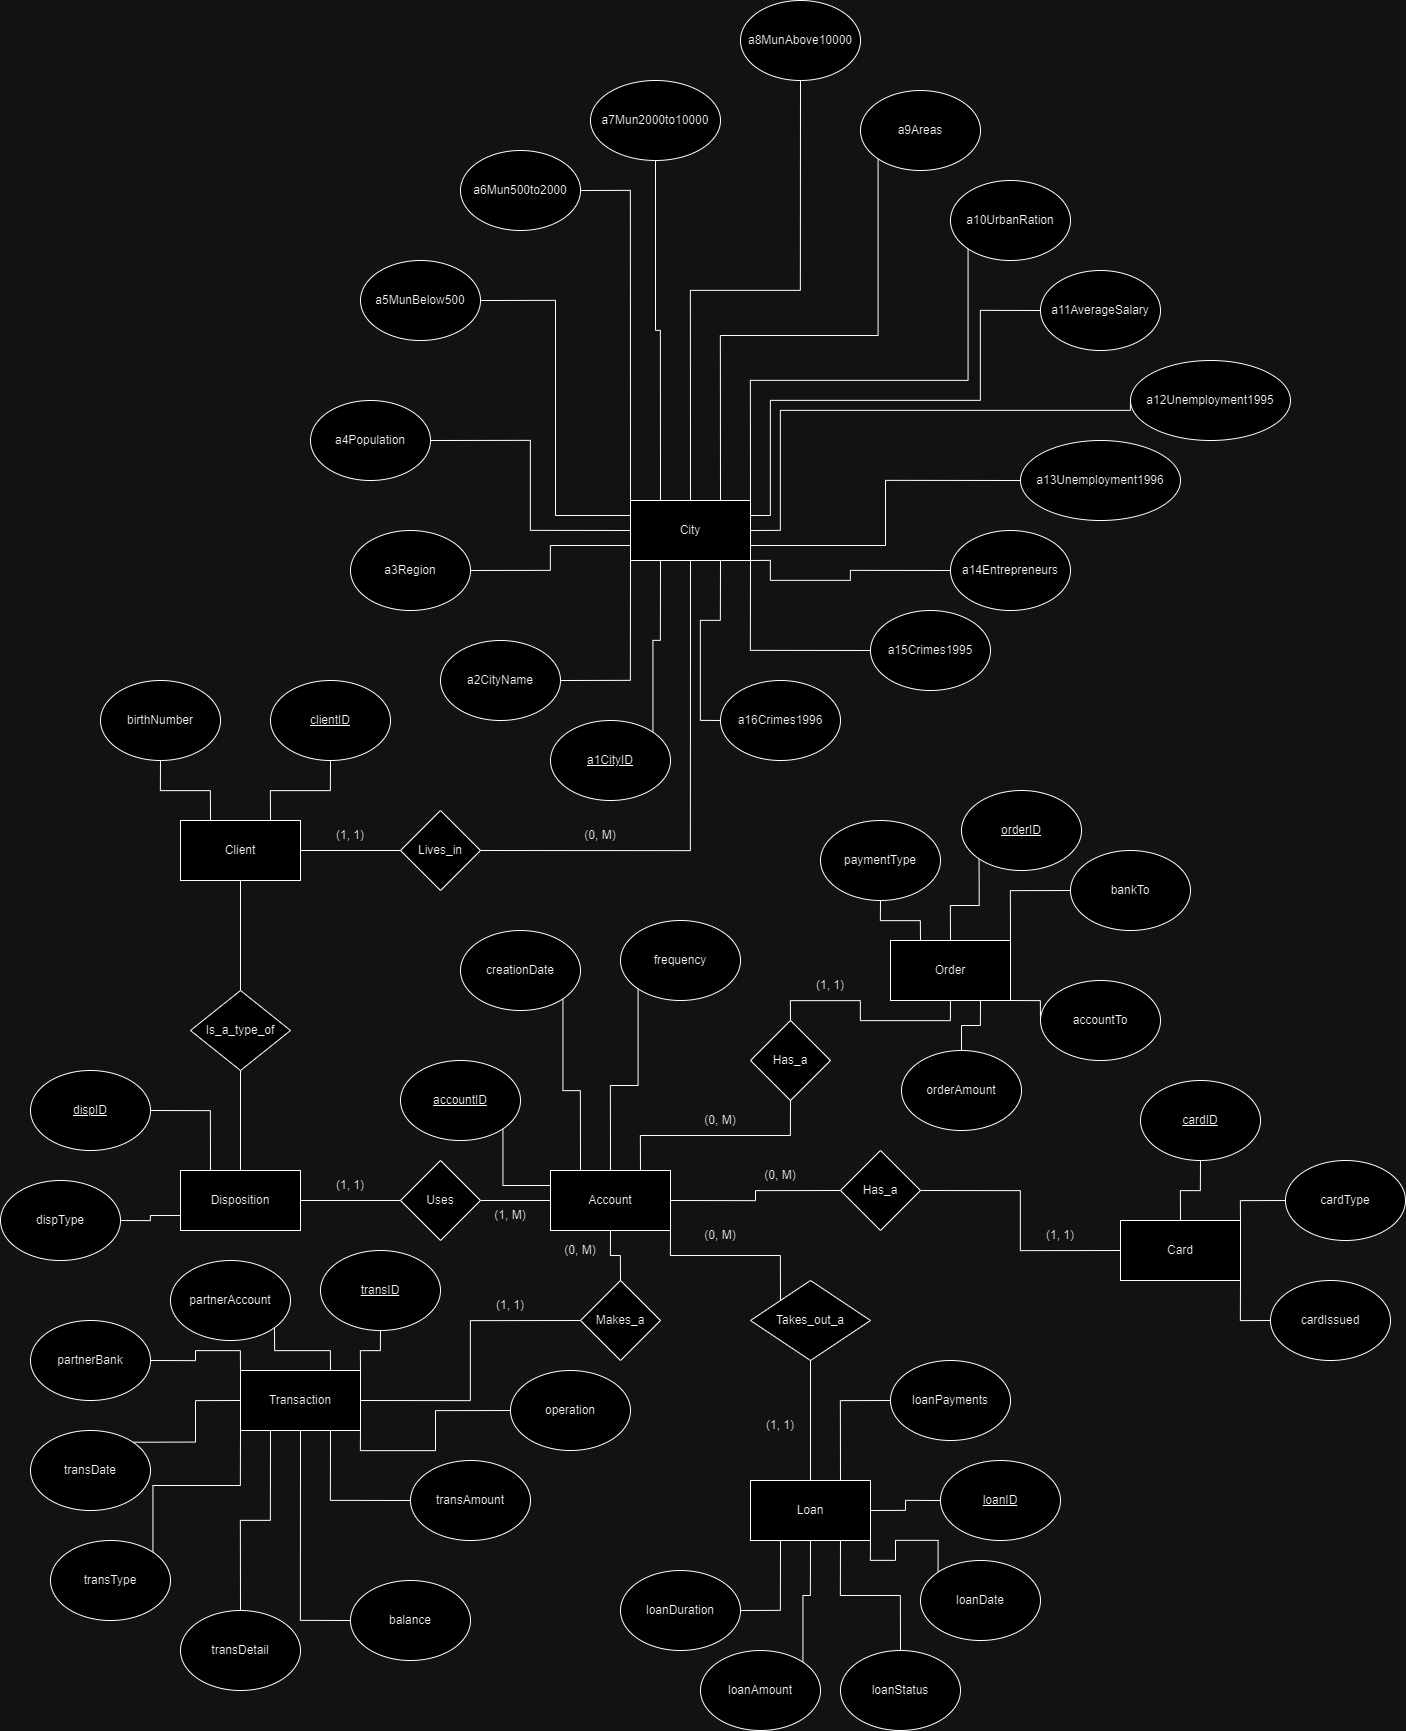

In [1]:
from IPython.display import Image

erm = Image(filename=('Copy of ERM.drawio.png'))
erm

The designated primary keys and relationships are shown in the ERM above. There are no functional dependencies. All of the tables in the ERM already had unique identifiers so these became the primary keys.

The database schema in 2NF is shown below:

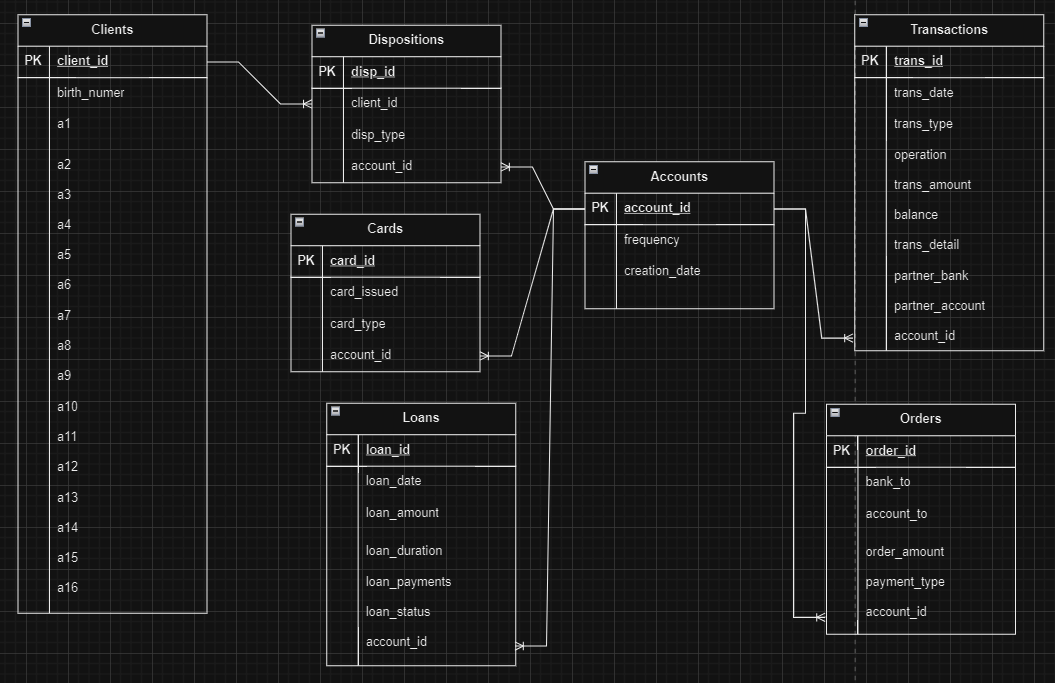

In [2]:
secondNF = Image(filename=('2nf.png'))
secondNF

The database schema in 3NF is shown below:

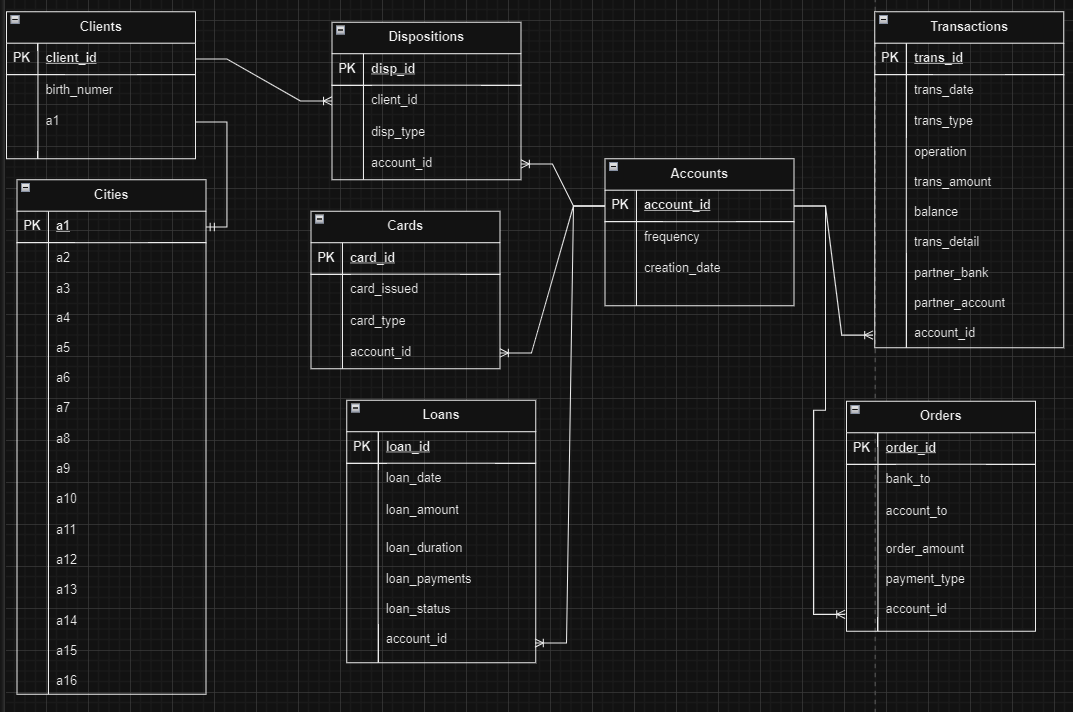

In [3]:
thirdNF = Image(filename=('3nf.png'))
thirdNF

The SQL code used to create the database is below:

CREATE TABLE Accounts (account_id PRIMARY KEY, frequency, creation_date);
INSERT INTO Accounts (account_id, frequency, creation_date) SELECT DISTINCT account_id, frequency, creation_date FROM BankRecords;
CREATE TABLE Cities (city_id PRIMARY KEY, city_name, region, population, municipalities_below500, municipalities_500to2000, municipalities_2000to10000, municipalities¬_above10000, region_areas, urban_inhabitants, salary, unemployment1995, unemployment1996, entrepreneurs, crimes1995, crimes1996);
INSERT INTO Cities (city_id PRIMARY KEY, city_name, region, population, municipalities_below500, municipalities_500to2000, municipalities_2000to10000, municipalities¬_above10000, region_areas, urban_inhabitants, salary, unemployment1995, unemployment1996, entrepreneurs, crimes1995, crimes1996) SELECT DISTINCT a1, a2, a3, a4, a5, a6, a7, a8, a9, a10, a11, a12, a13, a14, a15, a16 FROM BankRecords;
CREATE TABLE Clients (client_id PRIMARY KEY, birth_number, city_id, FOREIGN KEY (city_id) REFERENCES cities(city_id));
INSERT INTO Clients (client_id, birth_number, city_id) SELECT DISTINCT client_id, birth_number, city_id FROM BankRecords;
CREATE TABLE Cards (card_id PRIMARY KEY, card_issued, card_type, account_id, FOREIGN KEY (account_id) REFERENCES accounts(account_id));
INSERT INTO Cards (card_id, card_issued, card_type, account_id) SELECT DISTINCT card_id, card_issued, card_type, account_id FROM BankRecords WHERE card_id IS NOT NULL;
CREATE TABLE Loans (loan_id PRIMARY KEY, loan_date, loan_amount, loan_duration, loan_payments, loan_status, account_id, FOREIGN KEY (account_id) REFERENCES accounts(account_id));
INSERT INTO Loans (loan_id, loan_date, loan_amount, loan_duration, loan_payments, loan_status, account_id) SELECT DISTINCT loan_id, loan_date, loan_amount, loan_duration, loan_payments, loan_status, account_id FROM BankRecords WHERE loan_id IS NOT NULL;
CREATE TABLE Orders (order_id PRIMARY KEY, bank_to, account_to, order_amount, payment_type, account_id, FOREIGN KEY (account_id) REFERENCES accounts(account_id));
INSERT INTO Orders (order_id, bank_to, account_to, order_amount, payment_type, account_id) SELECT DISTINCT order_id, bank_to, account_to, order_amount, payment_type, account_id FROM BankRecords WHERE order_id IS NOT NULL;
CREATE TABLE Transactions (trans_id PRIMARY KEY,  trans_date, trans_type, operation, trans_amount, balance, trans_detail, partner_bank, partner_account, account_id, FOREIGN KEY (account_id) REFERENCES accounts(account_id));
INSERT INTO Transactions (trans_id, trans_date, trans_type, operation, trans_amount, balance, trans_detail, partner_bank, partner_account, account_id) SELECT DISTINCT trans_id, trans_date, trans_type, operation, trans_amount, balance, trans_detail, partner_bank, partner_account, account_id FROM BankRecords WHERE trans_id IS NOT NULL;
CREATE TABLE Disps (disp_id PRIMARY KEY, client_id, disp_type, account_id, FOREIGN KEY (account_id) REFERENCES accounts(account_id));
INSERT INTO Disps (disp_id, client_id, disp_type, account_id) SELECT DISTINCT disp_id, client_id, disp_type, account_id FROM BankRecords WHERE disp_id IS NOT NULL;


----
----


## Task 3: Research Design (25 Marks)

Using the database designed in Task 2, design and implement **five** potential modelling solutions to achieve the aim of the Data Intelligence team. You need to provide clear justifications about the techniques selected in the context of the 'problem in hand'. Your design must consist of a combination of inferential statistics, supervised learning algorithms, and unsupervised learning algorithms, and include **at least one** of those techniques. Finally, your modelling solutions should be of sufficient complexity, combining information from multiple tables from the database built in Task 2, as appropriate. Your answer should clearly show the queries made to the database. If amendments are made to the database, the commands should be clearly included in your answer.

Your answer should clearly cover the following:
* Any assumptions you are making about the given scenario;
* Any data processing and data integrity steps you would undertake to make the data fit for purpose;
* Which technique(s) you would apply for each solution and why;
* An evaluation of the techniques applied in terms of the accuracy of their results (or any other suitable evaluation measure);
* Algorithmic parameters should be adequately stated and discussed;
* A discussion of ethical considerations arising from the solutions selected.

**World Limit**: 500 words. This limit applies only to the explanations. There is no limit on any associated code or figures.

**Write your answer here (text cell(s) to be used, as appropriate)**

There can’t be initial data dropping as this would require a banking expert. There aren’t duplicates within the database as the SQL statements only added unique records. 

In [4]:
import pandas as pd
import numpy as np
import sqlite3

fileDB = "data.db"

In [5]:
#connecting to database
def create_connection(path):
    connection = None
    try:
        connection = sqlite3.connect(path)
    except:
        pass
    return connection

In [6]:
connection = create_connection(fileDB)

In [7]:
#creating a dataframe for each table and checking for any null values
loadQuery = "SELECT * FROM Accounts"
dfAccounts = pd.read_sql_query(sql = loadQuery, con=connection)
dfAccounts.isna().sum()

account_id       0
frequency        0
creation_date    0
dtype: int64

In [8]:
loadQuery = "SELECT * FROM Cards"
dfCards = pd.read_sql_query(sql = loadQuery, con=connection)
dfCards.isna().sum()

card_id        0
card_issued    0
card_type      0
account_id     0
dtype: int64

In [9]:
loadQuery = "SELECT * FROM Cities"
dfCities = pd.read_sql_query(sql = loadQuery, con=connection)
dfCities.isna().sum()

city_id                       0
city_name                     0
region                        0
population                    0
municipalities_below500       0
municipalities_500to2000      0
municipalities_2000to10000    0
municipalities¬_above10000    0
region_areas                  0
urban_inhabitants             0
salary                        0
unemployment1995              1
unemployment1996              0
entrepreneurs                 0
crimes1995                    1
crimes1996                    0
dtype: int64

In [10]:
dfCities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   city_id                     77 non-null     int64  
 1   city_name                   77 non-null     object 
 2   region                      77 non-null     object 
 3   population                  77 non-null     int64  
 4   municipalities_below500     77 non-null     int64  
 5   municipalities_500to2000    77 non-null     int64  
 6   municipalities_2000to10000  77 non-null     int64  
 7   municipalities¬_above10000  77 non-null     int64  
 8   region_areas                77 non-null     int64  
 9   urban_inhabitants           77 non-null     float64
 10  salary                      77 non-null     int64  
 11  unemployment1995            76 non-null     float64
 12  unemployment1996            77 non-null     float64
 13  entrepreneurs               77 non-nu

In [11]:
loadQuery = "SELECT * FROM Clients"
dfClients = pd.read_sql_query(sql = loadQuery, con=connection)
dfClients.isna().sum()

client_id       0
birth_number    0
city_id         0
dtype: int64

In [12]:
loadQuery = "SELECT * FROM Disps"
dfDisps = pd.read_sql_query(sql = loadQuery, con=connection)
dfDisps.isna().sum()

disp_id       0
client_id     0
disp_type     0
account_id    0
dtype: int64

In [13]:
loadQuery = "SELECT * FROM Loans"
dfLoans = pd.read_sql_query(sql = loadQuery, con=connection)
dfLoans.isna().sum()

loan_id          0
loan_date        0
loan_amount      0
loan_duration    0
loan_payments    0
loan_status      0
account_id       0
dtype: int64

In [14]:
loadQuery = "SELECT * FROM Orders"
dfOrders = pd.read_sql_query(sql = loadQuery, con=connection)
dfOrders.isna().sum()

order_id           0
bank_to            0
account_to         0
order_amount       0
payment_type    1379
account_id         0
dtype: int64

In [15]:
#where there are null values, checking how many non-null values there are
dfOrders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6471 entries, 0 to 6470
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   order_id      6471 non-null   int64  
 1   bank_to       6471 non-null   object 
 2   account_to    6471 non-null   int64  
 3   order_amount  6471 non-null   float64
 4   payment_type  5092 non-null   object 
 5   account_id    6471 non-null   int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 252.8+ KB


In [16]:
loadQuery = "SELECT * FROM Transactions"
dfTransactions = pd.read_sql_query(sql = loadQuery, con=connection)
dfTransactions.isna().sum()

trans_id                0
trans_date              0
trans_type              0
operation          183114
trans_amount            0
balance                 0
trans_detail       535314
partner_bank       782812
partner_account    760931
account_id              0
dtype: int64

In [17]:
dfTransactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1056320 entries, 0 to 1056319
Data columns (total 10 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   trans_id         1056320 non-null  int64  
 1   trans_date       1056320 non-null  int64  
 2   trans_type       1056320 non-null  object 
 3   operation        873206 non-null   object 
 4   trans_amount     1056320 non-null  float64
 5   balance          1056320 non-null  float64
 6   trans_detail     521006 non-null   object 
 7   partner_bank     273508 non-null   object 
 8   partner_account  295389 non-null   object 
 9   account_id       1056320 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 60.4+ MB


In [18]:
#checking that no records in Transactions have null values for both operation and trans_detail
dfTransactions[pd.isnull(dfTransactions['operation']) & pd.isnull(dfTransactions['trans_detail'])]

,trans_id,trans_date,trans_type,operation,trans_amount,balance,trans_detail,partner_bank,partner_account,account_id


Dropping and imputing:

In [19]:
#imputing
dfCities['unemployment1995'] = dfCities['unemployment1995'].fillna(dfCities['unemployment1995'].mean())

In [20]:
dfCities['crimes1995'] = dfCities['crimes1995'].fillna(dfCities['crimes1995'].mean())

In [21]:
dfTransactions['operation'] = dfTransactions['operation'].fillna(dfTransactions['trans_detail'])

In [22]:
#deleting
del dfTransactions['partner_bank']

In [23]:
del dfTransactions['partner_account']

In [24]:
del dfTransactions['trans_detail']

In [25]:
del dfOrders['payment_type']

In [26]:
#columns with potential for outliers are checked
Q3R = np.percentile(dfCities['region_areas'], 75)
Q1R = np.percentile(dfCities['region_areas'], 25)
IQRR = Q3R - Q1R
lowerBound = Q1R -1.5*IQRR
upperBound = Q3R +1.5*IQRR
dfCities[(dfCities['region_areas']<lowerBound) | (dfCities['region_areas']>upperBound)].sort_values(by="region_areas")

,city_id,city_name,region,population,municipalities_below500,municipalities_500to2000,municipalities_2000to10000,municipalities¬_above10000,region_areas,urban_inhabitants,salary,unemployment1995,unemployment1996,entrepreneurs,crimes1995,crimes1996


In [27]:
#checking for outliers
Q3R = np.percentile(dfCities['urban_inhabitants'], 75)
Q1R = np.percentile(dfCities['urban_inhabitants'], 25)
IQRR = Q3R - Q1R
lowerBound = Q1R -1.5*IQRR
upperBound = Q3R +1.5*IQRR
dfCities[(dfCities['urban_inhabitants']<lowerBound) | (dfCities['urban_inhabitants']>upperBound)].sort_values(by="urban_inhabitants")

,city_id,city_name,region,population,municipalities_below500,municipalities_500to2000,municipalities_2000to10000,municipalities¬_above10000,region_areas,urban_inhabitants,salary,unemployment1995,unemployment1996,entrepreneurs,crimes1995,crimes1996


In [28]:
Q3R = np.percentile(dfCities['population'], 75)
Q1R = np.percentile(dfCities['population'], 25)
IQRR = Q3R - Q1R
lowerBound = Q1R -1.5*IQRR
upperBound = Q3R +1.5*IQRR
dfCities[(dfCities['population']<lowerBound) | (dfCities['population']>upperBound)].sort_values(by="population")

,city_id,city_name,region,population,municipalities_below500,municipalities_500to2000,municipalities_2000to10000,municipalities¬_above10000,region_areas,urban_inhabitants,salary,unemployment1995,unemployment1996,entrepreneurs,crimes1995,crimes1996
28,72,Sheffield,South Yorkshire,226122,32,50,7,4,4,62.6,8994,3.80,4.79,110,9672.0,9208
17,68,Newcastle upon Tyne,Tyne and Wear,228848,15,40,18,2,6,57.2,9893,4.09,4.72,96,5623.0,5887
38,70,Glasgow,Glasgow,285387,0,2,8,5,7,89.9,10177,6.63,7.75,81,9878.0,10108
15,74,Manchester,Greater Manchester,323870,0,0,0,1,1,100.0,10673,4.75,5.44,100,18782.0,18347
9,54,Birmingham,West Midlands,387570,0,0,0,1,1,100.0,9897,1.60,1.96,140,18721.0,18696
1,1,London,Greater London,1204953,0,0,0,1,1,100.0,12541,0.29,0.43,167,85677.0,99107


In [29]:
#Outliers are capped at the 90th and 10th centiles
ninety = np.percentile(dfCities['population'], 90)
#rounding as can't have a fraction of a person
dfCities.loc[(dfCities['population'] > ninety), 'population'] = np.round(ninety)

In [30]:
Q3R = np.percentile(dfCities['municipalities_below500'], 75)
Q1R = np.percentile(dfCities['municipalities_below500'], 25)
IQRR = Q3R - Q1R
lowerBound = Q1R -1.5*IQRR
upperBound = Q3R +1.5*IQRR
dfCities[(dfCities['municipalities_below500']<lowerBound) | (dfCities['municipalities_below500']>upperBound)].sort_values(by="municipalities_below500")

,city_id,city_name,region,population,municipalities_below500,municipalities_500to2000,municipalities_2000to10000,municipalities¬_above10000,region_areas,urban_inhabitants,salary,unemployment1995,unemployment1996,entrepreneurs,crimes1995,crimes1996
64,66,Northampton,Northamptonshire,125832.0,151,41,2,3,5,48.3,8512,3.51,4.12,102,2247.0,2103


In [31]:
ninety = np.percentile(dfCities['municipalities_below500'], 90)
#rounding as can't have a fraction of a municipality
dfCities.loc[(dfCities['municipalities_below500'] > ninety), 'municipalities_below500'] = np.round(ninety)

In [32]:
Q3R = np.percentile(dfCities['municipalities_500to2000'], 75)
Q1R = np.percentile(dfCities['municipalities_500to2000'], 25)
IQRR = Q3R - Q1R
lowerBound = Q1R -1.5*IQRR
upperBound = Q3R +1.5*IQRR
ninety = np.percentile(dfCities['municipalities_500to2000'], 90)
dfCities[(dfCities['municipalities_500to2000']<lowerBound) | (dfCities['municipalities_500to2000']>upperBound)].sort_values(by="municipalities_500to2000")

,city_id,city_name,region,population,municipalities_below500,municipalities_500to2000,municipalities_2000to10000,municipalities¬_above10000,region_areas,urban_inhabitants,salary,unemployment1995,unemployment1996,entrepreneurs,crimes1995,crimes1996
49,55,Belfast,Belfast,157042.0,49.0,70,18,0,9,33.9,8743,1.88,2.43,111,3659.0,3894


In [33]:
ninety = np.percentile(dfCities['municipalities_500to2000'], 90)
#rounding as can't have a fraction of a municipality
dfCities.loc[(dfCities['municipalities_500to2000'] > ninety), 'municipalities_500to2000'] = np.round(ninety)

In [34]:
Q3R = np.percentile(dfCities['municipalities_2000to10000'], 75)
Q1R = np.percentile(dfCities['municipalities_2000to10000'], 25)
IQRR = Q3R - Q1R
lowerBound = Q1R -1.5*IQRR
upperBound = Q3R +1.5*IQRR
dfCities[(dfCities['municipalities_2000to10000']<lowerBound) | (dfCities['municipalities_2000to10000']>upperBound)].sort_values(by="municipalities_2000to10000")

,city_id,city_name,region,population,municipalities_below500,municipalities_500to2000,municipalities_2000to10000,municipalities¬_above10000,region_areas,urban_inhabitants,salary,unemployment1995,unemployment1996,entrepreneurs,crimes1995,crimes1996
17,68,Newcastle upon Tyne,Tyne and Wear,179422.0,15.0,40.0,18,2,6,57.2,9893,4.09,4.72,96,5623.0,5887
49,55,Belfast,Belfast,157042.0,49.0,41.0,18,0,9,33.9,8743,1.88,2.43,111,3659.0,3894
7,57,Coventry,West Midlands,161954.0,21.0,37.0,20,3,8,48.0,8720,3.73,4.50,116,3729.0,3651


In [35]:
ninety = np.percentile(dfCities['municipalities_2000to10000'], 90)
#rounding as can't have a fraction of a municipality
dfCities.loc[(dfCities['municipalities_2000to10000'] > ninety), 'municipalities_2000to10000'] = np.round(ninety)

In [36]:
Q3R = np.percentile(dfCities['municipalities¬_above10000'], 75)
Q1R = np.percentile(dfCities['municipalities¬_above10000'], 25)
IQRR = Q3R - Q1R
lowerBound = Q1R -1.5*IQRR
upperBound = Q3R +1.5*IQRR
dfCities[(dfCities['municipalities¬_above10000']<lowerBound) | (dfCities['municipalities¬_above10000']>upperBound)].sort_values(by="municipalities¬_above10000")

,city_id,city_name,region,population,municipalities_below500,municipalities_500to2000,municipalities_2000to10000,municipalities¬_above10000,region_areas,urban_inhabitants,salary,unemployment1995,unemployment1996,entrepreneurs,crimes1995,crimes1996
28,72,Sheffield,South Yorkshire,179422.0,32.0,41.0,7.0,4,4,62.6,8994,3.80,4.79,110,9672.0,9208
58,34,Portsmouth,Hampshire,125236.0,28.0,11.0,1.0,4,5,87.7,9675,6.43,7.68,100,5323.0,5190
65,71,Cardiff,Cardiff,161227.0,5.0,35.0,11.0,4,10,69.7,8678,5.93,5.57,102,4980.0,4595
38,70,Glasgow,Glasgow,179422.0,0.0,2.0,8.0,5,7,89.9,10177,6.63,7.75,81,9878.0,10108


In [37]:
ninety = np.percentile(dfCities['municipalities¬_above10000'], 90)
#rounding as can't have a fraction of a municipality
dfCities.loc[(dfCities['municipalities¬_above10000'] > ninety), 'municipalities¬_above10000'] = np.round(ninety)

In [38]:
Q3R = np.percentile(dfCities['region_areas'], 75)
Q1R = np.percentile(dfCities['region_areas'], 25)
IQRR = Q3R - Q1R
lowerBound = Q1R -1.5*IQRR
upperBound = Q3R +1.5*IQRR
dfCities[(dfCities['region_areas']<lowerBound) | (dfCities['region_areas']>upperBound)].sort_values(by="region_areas")

,city_id,city_name,region,population,municipalities_below500,municipalities_500to2000,municipalities_2000to10000,municipalities¬_above10000,region_areas,urban_inhabitants,salary,unemployment1995,unemployment1996,entrepreneurs,crimes1995,crimes1996


In [39]:
Q3R = np.percentile(dfCities['urban_inhabitants'], 75)
Q1R = np.percentile(dfCities['urban_inhabitants'], 25)
IQRR = Q3R - Q1R
lowerBound = Q1R -1.5*IQRR
upperBound = Q3R +1.5*IQRR
dfCities[(dfCities['urban_inhabitants']<lowerBound) | (dfCities['urban_inhabitants']>upperBound)].sort_values(by="urban_inhabitants")

,city_id,city_name,region,population,municipalities_below500,municipalities_500to2000,municipalities_2000to10000,municipalities¬_above10000,region_areas,urban_inhabitants,salary,unemployment1995,unemployment1996,entrepreneurs,crimes1995,crimes1996


In [40]:
Q3R = np.percentile(dfCities['salary'], 75)
Q1R = np.percentile(dfCities['salary'], 25)
IQRR = Q3R - Q1R
lowerBound = Q1R -1.5*IQRR
upperBound = Q3R +1.5*IQRR
dfCities[(dfCities['salary']<lowerBound) | (dfCities['salary']>upperBound)].sort_values(by="salary")

,city_id,city_name,region,population,municipalities_below500,municipalities_500to2000,municipalities_2000to10000,municipalities¬_above10000,region_areas,urban_inhabitants,salary,unemployment1995,unemployment1996,entrepreneurs,crimes1995,crimes1996
15,74,Manchester,Greater Manchester,179422.0,0.0,0.0,0.0,1.0,1,100.0,10673,4.75,5.44,100,18782.0,18347
43,26,Edinburgh,Edinburgh,170449.0,0.0,0.0,0.0,1.0,1,100.0,10787,2.64,3.09,131,6041.0,6261
40,8,Peterborough,Cambridgeshire,112065.0,87.0,19.0,7.0,1.0,8,69.4,11277,1.25,1.44,127,5179.0,4987
1,1,London,Greater London,179422.0,0.0,0.0,0.0,1.0,1,100.0,12541,0.29,0.43,167,85677.0,99107


In [41]:
ninety = np.percentile(dfCities['salary'], 90)
dfCities.loc[(dfCities['salary'] > ninety), 'salary'] = ninety

In [42]:
Q3R = np.percentile(dfCities['unemployment1995'], 75)
Q1R = np.percentile(dfCities['unemployment1995'], 25)
IQRR = Q3R - Q1R
lowerBound = Q1R -1.5*IQRR
upperBound = Q3R +1.5*IQRR
dfCities[(dfCities['unemployment1995']<lowerBound) | (dfCities['unemployment1995']>upperBound)].sort_values(by="unemployment1995")

,city_id,city_name,region,population,municipalities_below500,municipalities_500to2000,municipalities_2000to10000,municipalities¬_above10000,region_areas,urban_inhabitants,salary,unemployment1995,unemployment1996,entrepreneurs,crimes1995,crimes1996
24,38,Stockport,Greater Manchester,85852.0,41.0,23.0,4.0,2.0,4,59.8,8965.0,7.08,8.23,104,2653.0,2822
29,39,Bournemouth,Dorset,119895.0,17.0,4.0,3.0,2.0,4,89.9,9970.0,7.34,9.40,90,4947.0,4743


In [43]:
ninety = np.percentile(dfCities['unemployment1995'], 90)
dfCities.loc[(dfCities['unemployment1995'] > ninety), 'unemployment1995'] = ninety

In [44]:
Q3R = np.percentile(dfCities['unemployment1996'], 75)
Q1R = np.percentile(dfCities['unemployment1996'], 25)
IQRR = Q3R - Q1R
lowerBound = Q1R -1.5*IQRR
upperBound = Q3R +1.5*IQRR
dfCities[(dfCities['unemployment1996']<lowerBound) | (dfCities['unemployment1996']>upperBound)].sort_values(by="unemployment1996")

,city_id,city_name,region,population,municipalities_below500,municipalities_500to2000,municipalities_2000to10000,municipalities¬_above10000,region_areas,urban_inhabitants,salary,unemployment1995,unemployment1996,entrepreneurs,crimes1995,crimes1996
29,39,Bournemouth,Dorset,119895.0,17.0,4.0,3.0,2.0,4,89.9,9970.0,5.744,9.4,90,4947.0,4743


In [45]:
ninety = np.percentile(dfCities['unemployment1996'], 90)
dfCities.loc[(dfCities['unemployment1996'] > ninety), 'unemployment1996'] = ninety

In [46]:
Q3R = np.percentile(dfCities['entrepreneurs'], 75)
Q1R = np.percentile(dfCities['entrepreneurs'], 25)
IQRR = Q3R - Q1R
lowerBound = Q1R -1.5*IQRR
upperBound = Q3R +1.5*IQRR
dfCities[(dfCities['entrepreneurs']<lowerBound) | (dfCities['entrepreneurs']>upperBound)].sort_values(by="entrepreneurs")

,city_id,city_name,region,population,municipalities_below500,municipalities_500to2000,municipalities_2000to10000,municipalities¬_above10000,region_areas,urban_inhabitants,salary,unemployment1995,unemployment1996,entrepreneurs,crimes1995,crimes1996
1,1,London,Greater London,179422.0,0.0,0.0,0.0,1.0,1,100.0,9970.0,0.29,0.43,167,85677.0,99107


In [47]:
ninety = np.percentile(dfCities['entrepreneurs'], 90)
#rounding as can't have a fraction of an entrepreneur
dfCities.loc[(dfCities['entrepreneurs'] > ninety), 'entrepreneurs'] = np.round(ninety)

In [48]:
Q3R = np.percentile(dfCities['crimes1995'], 75)
Q1R = np.percentile(dfCities['crimes1995'], 25)
IQRR = Q3R - Q1R
lowerBound = Q1R -1.5*IQRR
upperBound = Q3R +1.5*IQRR
dfCities[(dfCities['crimes1995']<lowerBound) | (dfCities['crimes1995']>upperBound)].sort_values(by="crimes1995")

,city_id,city_name,region,population,municipalities_below500,municipalities_500to2000,municipalities_2000to10000,municipalities¬_above10000,region_areas,urban_inhabitants,salary,unemployment1995,unemployment1996,entrepreneurs,crimes1995,crimes1996
28,72,Sheffield,South Yorkshire,179422.0,32.0,41.0,7.0,3.0,4,62.6,8994.0,3.800,4.790,110.0,9672.0,9208
38,70,Glasgow,Glasgow,179422.0,0.0,2.0,8.0,3.0,7,89.9,9970.0,5.744,6.148,81.0,9878.0,10108
9,54,Birmingham,West Midlands,179422.0,0.0,0.0,0.0,1.0,1,100.0,9897.0,1.600,1.960,136.0,18721.0,18696
15,74,Manchester,Greater Manchester,179422.0,0.0,0.0,0.0,1.0,1,100.0,9970.0,4.750,5.440,100.0,18782.0,18347
1,1,London,Greater London,179422.0,0.0,0.0,0.0,1.0,1,100.0,9970.0,0.290,0.430,136.0,85677.0,99107


In [49]:
ninety = np.percentile(dfCities['crimes1995'], 90)
#rounding as can't have a fraction of a crime
dfCities.loc[(dfCities['crimes1995'] > ninety), 'crimes1995'] = np.round(ninety)

In [50]:
Q3R = np.percentile(dfCities['crimes1996'], 75)
Q1R = np.percentile(dfCities['crimes1996'], 25)
IQRR = Q3R - Q1R
lowerBound = Q1R -1.5*IQRR
upperBound = Q3R +1.5*IQRR
dfCities[(dfCities['crimes1996']<lowerBound) | (dfCities['crimes1996']>upperBound)].sort_values(by="crimes1996")

,city_id,city_name,region,population,municipalities_below500,municipalities_500to2000,municipalities_2000to10000,municipalities¬_above10000,region_areas,urban_inhabitants,salary,unemployment1995,unemployment1996,entrepreneurs,crimes1995,crimes1996
28,72,Sheffield,South Yorkshire,179422.0,32.0,41.0,7.0,3.0,4,62.6,8994.0,3.800,4.790,110.0,6225.0,9208
38,70,Glasgow,Glasgow,179422.0,0.0,2.0,8.0,3.0,7,89.9,9970.0,5.744,6.148,81.0,6225.0,10108
15,74,Manchester,Greater Manchester,179422.0,0.0,0.0,0.0,1.0,1,100.0,9970.0,4.750,5.440,100.0,6225.0,18347
9,54,Birmingham,West Midlands,179422.0,0.0,0.0,0.0,1.0,1,100.0,9897.0,1.600,1.960,136.0,6225.0,18696
1,1,London,Greater London,179422.0,0.0,0.0,0.0,1.0,1,100.0,9970.0,0.290,0.430,136.0,6225.0,99107


In [51]:
ninety = np.percentile(dfCities['crimes1996'], 90)
#rounding as can't have a fraction of a crime
dfCities.loc[(dfCities['crimes1996'] > ninety), 'crimes1996'] = np.round(ninety)

In [52]:
Q3R = np.percentile(dfOrders['order_amount'], 75)
Q1R = np.percentile(dfOrders['order_amount'], 25)
IQRR = Q3R - Q1R
lowerBound = Q1R -1.5*IQRR
upperBound = Q3R +1.5*IQRR
dfOrders[(dfOrders['order_amount']<lowerBound) | (dfOrders['order_amount']>upperBound)].sort_values(by="order_amount")

,order_id,bank_to,account_to,order_amount,account_id
2310,31957,MN,42665183,9678.0,1749
3425,33187,YZ,41427993,9687.0,2553
5517,36413,EF,85673802,9689.0,4774
4817,34741,EF,48173946,9698.0,3622
5521,36447,KL,80407201,9698.0,4794
...,...,...,...,...,...
1862,31458,AB,60094183,14707.0,1396
4176,34023,IJ,68203913,14723.0,3115
6311,44599,YZ,6128639,14801.0,10257
1124,30634,EF,23098129,14811.0,850


In [53]:
ninety = np.percentile(dfOrders['order_amount'], 90)
ten = np.percentile(dfOrders['order_amount'], 10)
dfOrders.loc[(dfOrders['order_amount'] > ninety), 'order_amount'] = ninety
dfOrders.loc[(dfOrders['order_amount'] < ten), 'order_amount'] = ten

In [54]:
Q3R = np.percentile(dfTransactions['trans_amount'], 75)
Q1R = np.percentile(dfTransactions['trans_amount'], 25)
IQRR = Q3R - Q1R
lowerBound = Q1R -1.5*IQRR
upperBound = Q3R +1.5*IQRR
dfTransactions[(dfTransactions['trans_amount']<lowerBound) | (dfTransactions['trans_amount']>upperBound)].sort_values(by="trans_amount")

,trans_id,trans_date,trans_type,operation,trans_amount,balance,account_id
415140,557540,970718,Credit,Credit in cash,16797.0,53481.3,1897
925126,1596420,970506,Credit,Credit in cash,16797.0,43318.9,5423
967185,2292604,980426,Withdrawal in cash,Withdrawal in cash,16798.0,56513.0,7562
329075,443355,980908,Credit,Credit in cash,16798.0,66576.3,1508
1020897,2931537,980208,Credit,Credit in cash,16799.0,79527.4,9707
...,...,...,...,...,...,...,...
867068,1170721,980615,Withdrawal,Withdrawal in cash,81900.0,21885.1,4014
873905,1207200,980619,Withdrawal,Withdrawal in cash,85800.0,5051.6,4130
635513,855512,960614,Withdrawal,Withdrawal in cash,86400.0,29421.5,2915
896561,1306770,980606,Withdrawal,Withdrawal in cash,87300.0,14321.1,4462


In [55]:
ninety = np.percentile(dfTransactions['trans_amount'], 90)
dfTransactions.loc[(dfTransactions['trans_amount'] > ninety), 'trans_amount'] = ninety
ten = np.percentile(dfTransactions['trans_amount'], 10)
dfTransactions.loc[(dfTransactions['trans_amount'] < ten), 'trans_amount'] = ten

In [56]:
Q3R = np.percentile(dfTransactions['balance'], 75)
Q1R = np.percentile(dfTransactions['balance'], 25)
IQRR = Q3R - Q1R
lowerBound = Q1R -1.5*IQRR
upperBound = Q3R +1.5*IQRR
dfTransactions[(dfTransactions['balance']<lowerBound) | (dfTransactions['balance']>upperBound)].sort_values(by="balance")

,trans_id,trans_date,trans_type,operation,trans_amount,balance,account_id
724086,3449030,981130,Withdrawal,Withdrawal in cash,187.3,-41125.7,3326
724085,976203,981115,Withdrawal,Withdrawal in cash,5900.0,-40938.4,3326
724076,3449026,980731,Withdrawal,Withdrawal in cash,236.1,-40817.0,3326
724075,976199,980718,Withdrawal,Withdrawal in cash,200.0,-40581.0,3326
724074,3449025,980630,Withdrawal,Withdrawal in cash,236.1,-40381.0,3326
...,...,...,...,...,...,...,...
997628,2675921,981226,Credit,Credit in cash,18400.0,192662.5,8856
474503,637133,930802,Credit,Credit in cash,18400.0,193909.9,2176
225919,302121,980501,Credit,Credit in cash,18400.0,194119.3,1029
1003867,2736083,970307,Credit,Credit in cash,18400.0,196106.5,9052


In [57]:
ninety = np.percentile(dfTransactions['balance'], 90)
dfTransactions.loc[(dfTransactions['balance'] > ninety), 'balance'] = ninety
ten = np.percentile(dfTransactions['balance'], 10)
dfTransactions.loc[(dfTransactions['balance'] < ten), 'balance'] = ten

In [58]:
dfLoans['loan_amount'] = dfLoans['loan_amount'].apply(pd.to_numeric)

In [59]:
Q3R = np.percentile(dfLoans['loan_amount'], 75)
Q1R = np.percentile(dfLoans['loan_amount'], 25)
IQRR = Q3R - Q1R
lowerBound = Q1R -1.5*IQRR
upperBound = Q3R +1.5*IQRR
dfLoans[(dfLoans['loan_amount']<lowerBound) | (dfLoans['loan_amount']>upperBound)].sort_values(by="loan_amount")

,loan_id,loan_date,loan_amount,loan_duration,loan_payments,loan_status,account_id
151,5491,980213,428784,48,8933.0,C,2545
166,5561,980829,437460,60,7291.0,C,2910
211,5725,960723,444864,48,9268.0,C,3679
212,5731,971105,460980,60,7683.0,D,3711
352,6228,931201,464520,60,7742.0,B,6034
274,5970,950709,465072,48,9689.0,C,4774
276,5976,971227,465504,48,9698.0,D,4794
150,5486,970613,466608,48,9721.0,C,2516
21,5043,971225,468060,60,7801.0,C,339
463,6625,970907,473280,60,7888.0,D,7966


In [60]:
ninety = np.percentile(dfLoans['loan_amount'], 90)
dfLoans.loc[(dfLoans['loan_amount'] > ninety), 'loan_amount'] = ninety
ten = np.percentile(dfLoans['loan_amount'], 10)
dfLoans.loc[(dfLoans['loan_amount'] < ten), 'loan_amount'] = ten

In [61]:
dfLoans['loan_duration'] = dfLoans['loan_duration'].apply(pd.to_numeric)

In [62]:
Q3R = np.percentile(dfLoans['loan_duration'], 75)
Q1R = np.percentile(dfLoans['loan_duration'], 25)
IQRR = Q3R - Q1R
lowerBound = Q1R -1.5*IQRR
upperBound = Q3R +1.5*IQRR
dfLoans[(dfLoans['loan_duration']<lowerBound) | (dfLoans['loan_duration']>upperBound)].sort_values(by="loan_duration")

,loan_id,loan_date,loan_amount,loan_duration,loan_payments,loan_status,account_id


In [63]:
dfLoans['loan_payments'] = dfLoans['loan_payments'].apply(pd.to_numeric)

In [64]:
Q3R = np.percentile(dfLoans['loan_payments'], 75)
Q1R = np.percentile(dfLoans['loan_payments'], 25)
IQRR = Q3R - Q1R
lowerBound = Q1R -1.5*IQRR
upperBound = Q3R +1.5*IQRR
dfLoans[(dfLoans['loan_payments']<lowerBound) | (dfLoans['loan_payments']>upperBound)].sort_values(by="loan_payments")

,loan_id,loan_date,loan_amount,loan_duration,loan_payments,loan_status,account_id


The data was searched for missing data. Where this was found, the number of non-null values was found to calculate the percentage of lost data. List-wise deletion can’t be used as the amount of missing data and the normalisation mean it would lead to a large loss of records. Unemployment1995 and crimes1995 are missing at random likely due to a loss of data in Exeter that year. They’ll be imputed. Partner_bank and partner_account are missing at random when there is a cash transaction because a partner isn’t involved. They’ll be dropped as more data is missing than available and the partner isn’t important. Payment_type and trans_detail are missing completely at random so may be optional fields in the recording process. As many records are missing these, they’ll be dropped. Operation is missing at random when trans_detail is “Interest credited”. As this is similar to and dependent on trans_detail, it’ll be imputed with trans_detail. Most outliers are natural such as due to some cities being bigger than others so will be capped but not removed to protect modelling but keep the integrity of which records rank where.

In [65]:
#importing everything needed for the following models
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix  
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
from sklearn.utils import shuffle
from sklearn import tree
from scipy import stats
import seaborn as sns

1) Do city demographics impact on the city’s average age of account? Using multiple regression as considering the impact of multiple variables on one outcome. This will analyse where the bank has more long term users and therefore stronger retention

In [66]:
#Creating the lists for the X and Y axis
total = dfCities.shape[0]
yCities = []
xCities = []
calculateList = []
for i in range(0,total):
    calculateList.extend([[0,0]])
totalLoop = dfAccounts.loc[dfAccounts['account_id'].idxmax()]
totalLoop = totalLoop[0]
for i in range(1, totalLoop+1):
    #getting data needed to work out average creation date
    theClient = dfDisps.query('account_id == @i')['client_id']
    try:
        theClient = int(theClient)
        theCity = dfClients.query('client_id == @theClient')['city_id']
        try:
            theCity = int(theCity)
            currentTotal = calculateList[theCity-1][0]
            toAdd = dfAccounts.query('account_id == @i')['creation_date']
            try:
                toAdd = int(toAdd)
                newTotal = currentTotal + toAdd
                calculateList[theCity-1][0] = newTotal
                calculateList[theCity-1][1] += 1
            except:
                pass
        except:
            pass
    except:
        pass
for i in range (1, total+1):    
    #getting data about this city
    thisC1995 = dfCities.query('city_id == @i')['crimes1995']
    thisC1995 = int(thisC1995)
    thisEntrepreneurs = dfCities.query('city_id == @i')['entrepreneurs']
    thisEntrepreneurs = int(thisEntrepreneurs)
    thisC1996 = dfCities.query('city_id == @i')['crimes1996']
    thisC1996 = int(thisC1996)
    thisPopulation = dfCities.query('city_id == @i')['population']
    thisPopulation = int(thisPopulation)
    thisAreas = dfCities.query('city_id == @i')['region_areas']
    thisAreas = int(thisAreas)
    be500to2000 = dfCities.query('city_id == @i')['municipalities_500to2000']
    be500to2000 = int(be500to2000)
    above10000 = dfCities.query('city_id == @i')['municipalities¬_above10000']
    above10000 = int(above10000)
    xCities.append([thisC1995, thisEntrepreneurs, thisC1996, thisPopulation, thisAreas, be500to2000, above10000])
for i in calculateList:
    #calculating the averages
    total = i[0]
    count = i[1]
    average = total/count
    yCities.append(average)

In [67]:
#Making the lists into dataframes
dfXCities = pd.DataFrame(xCities, columns=['crimes1995', 'entrepreneurs', 'crimes1996', 'population', 'areas', 'be500to2000', 'above10000'])
dfYCities = pd.DataFrame(yCities, columns=['retention'])

In [68]:
#Splitting into training and testing
split = int(dfXCities.shape[0]*0.8)

dfXCitiesTrain = dfXCities.iloc[:split]
dfXCitiesTest  = dfXCities.iloc[split:]

dfYCitiesTrain = dfYCities.iloc[:split]
dfYCitiesTest  = dfYCities.iloc[split:]

In [69]:
#training the regression model [1]
lrCities = linear_model.LinearRegression()
#algorithmic parameters - city's average account creation date and city demographic data
lrCities.fit(X=dfXCitiesTrain, y=dfYCitiesTrain)
print("Regression coefficients: ", lrCities.coef_)
print("Intercept coefficient: ", lrCities.intercept_)

Regression coefficients:  [[-2.31349075e+00  3.28603447e+01  2.31642933e+00  1.19753804e-02
   4.76765169e+01  1.20566136e+01  4.43046833e+02]]
Intercept coefficient:  [945210.59428043]


In [70]:
#Testing the model
dfYCitiesTestPredict = lrCities.predict(dfXCitiesTest)
dfCitiesResults = pd.DataFrame(data = {'Actual':dfYCitiesTest['retention'], 'Predicted':dfYCitiesTestPredict.flatten()})

In [71]:
#Evaluating accuracy of the model
print('R2', r2_score(dfYCitiesTest['retention'], dfYCitiesTestPredict.flatten()))

R2 -1.905092105348515


In [72]:
stats.pearsonr(dfYCitiesTest['retention'], dfYCitiesTestPredict.flatten())

(0.30925356712101415, 0.24380813893421485)

2) Do credit cards lead to lower balances? Using T-tests as evaluating one variable’s impact on another. Significance level 0.05. Null hypothesis: credit cards don’t lead to lower balances. Alternative hypothesis: credit cards do lead to lower balances. Assumes the bank is allowing clients with low balances to take out credit cards. This will help improve risk assessments for credit cards. Ethical considerations include, if the bank changes its assessments, clients who would have been granted a card may be refused unnecessarily. 

In [73]:
#preprocessing
dfCards['card_id'] = dfCards['card_id'].apply(pd.to_numeric)
dfCards['account_id'] = dfCards['account_id'].apply(pd.to_numeric)
dfAccounts['account_id'] = dfAccounts['account_id'].apply(pd.to_numeric)

In [74]:
#creating the lists
#getting the maximum card ID
total = dfCards.loc[dfCards['card_id'].idxmax()]
total = total[0]
#the lists for balances depending on card ownership
yesCard = []
noCard = []
#the list of accounts found to have a card so that those that don't can also be found
yesAccounts = []
for i in range (1, total+1):
    #getting the account ID for this card  ID
    thisAccount = dfCards.query('card_id == @i')['account_id']
    try:
        thisAccount = int(thisAccount)
        yesAccounts.append(thisAccount)
        #getting the transaction dates for this account so that the balance can be its latest state
        thisDate = dfTransactions.query('account_id == @thisAccount')['trans_date']
        latest = thisDate.max()
        #getting the balance for the latest date
        thisBalance = dfTransactions.query('account_id == @thisAccount & trans_date == @latest')['balance']
        if len(thisBalance) > 1:
            #dealing with situations where more than one transaction was made on the last date
            theseIDs = dfTransactions.query('account_id == @thisAccount & trans_date == @latest')['trans_id']
            latestID = theseIDs.max()
            thisBalance = dfTransactions.query('account_id == @thisAccount & trans_date == @latest & trans_id == @latestID')['balance']
        #Assumes where account has multiple transactions on same date, highest trans_id of those on that day is the latest
        thisBalance = float(thisBalance)
        yesCard.append(thisBalance)
    except:
        pass
total2 = dfAccounts.loc[dfAccounts['account_id'].idxmax()]
#getting the largest account ID
total2 = total2[0]
for i in range (1, total2+1):
    thisAccount = dfAccounts.query('account_id == @i')['account_id']
    try:
        thisAccount = int(thisAccount)
        #checking if the account has a credit card
        if thisAccount not in yesAccounts:
            #if it doesn't getting its transactions dates
            thisDate = dfTransactions.query('account_id == @thisAccount')['trans_date']
            latest = thisDate.max()
            #getting the balance for the latest date
            thisBalance = dfTransactions.query('account_id == @thisAccount & trans_date == @latest')['balance']
            if len(thisBalance) > 1:
                theseIDs = dfTransactions.query('account_id == @thisAccount & trans_date == @latest')['trans_id']
                latestID = theseIDs.max()
                thisBalance = dfTransactions.query('account_id == @thisAccount & trans_date == @latest & trans_id == @latestID')['balance']
            thisBalance = float(thisBalance)
            noCard.append(thisBalance)
    except:
        pass

In [75]:
#creating the numpy arrays
withCard = np.array(yesCard)
withoutCard = np.array(noCard)

In [76]:
#doing the t test
#algorithmic parameters - balance (using the most recent transaction) and if the account has a card or not
tStat, pValue = stats.ttest_ind(withoutCard, withCard)
print(tStat)

-29.029853484257472


In [77]:
#getting the critical value
alpha = 0.05
dof = len(withoutCard) + len(withCard) - 2
tCritical = stats.t.ppf(alpha, df=dof)
print(tCritical)

-1.6451924630869015


3) Do people living in cities with higher average salaries make more transactions? Using regression as plotting one variable against another. This will analyse where the bank is most used to target better retention. Ethical considerations include areas that are already deprived may be further if the bank removes services due to a lack of transactions.

In [78]:
#Creating the axis
total = dfAccounts.loc[dfAccounts['account_id'].idxmax()]
total = total[0]
cityTotal = dfCities.loc[dfCities['city_id'].idxmax()]
cityTotal = cityTotal[0]
yTransactions = [0] * (cityTotal)
#getting the average salaries
salaries = pd.DataFrame(dfCities.sort_values('city_id'))
dfxSalary = pd.DataFrame(salaries['salary'], columns = ['Salary'])
for i in range (1, total+1):
    #getting the numbers of transactions
    thisAccount = len(dfTransactions[dfTransactions.account_id == i])
    theClient = dfDisps.query('account_id == @i')['client_id']
    try:
        theClient = int(theClient)
        theCity = dfClients.query('client_id == @theClient')['city_id']
        try:
            theCity = int(theCity)
            yTransactions[theCity] = yTransactions[theCity] + thisAccount
        except:
            pass
    except:
         pass

In [79]:
#creating the dataframes
salariesDF = pd.DataFrame(dfxSalary, columns=['Salary'])
dfyTransactions = pd.DataFrame(yTransactions, columns=['transactions'])

In [80]:
#capping any outliers for number of transactions
ninety = np.percentile(dfyTransactions['transactions'], 90)
ten = np.percentile(dfyTransactions['transactions'], 10)
dfyTransactions.loc[(dfyTransactions['transactions'] > ninety), 'transactions'] = ninety
dfyTransactions.loc[(dfyTransactions['transactions'] < ten), 'transactions'] = ten

In [81]:
salaryList = list(salaries['salary'])
transList = list(dfyTransactions['transactions'])

In [82]:
dfMerged = pd.DataFrame(data={"Salary":salaryList, "Transactions":transList})

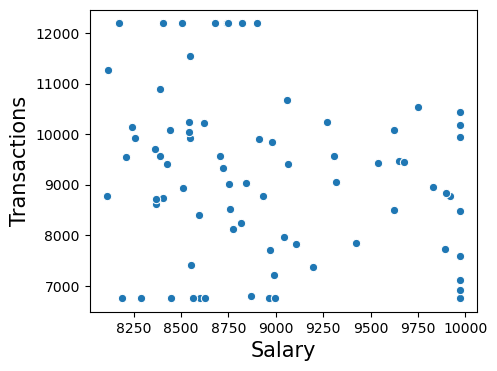

In [83]:
#plotting original data
plt.figure(figsize=(5,4), dpi=100)
ax = sns.scatterplot(x="Salary", y="Transactions", data=dfMerged, marker='o')
ax.set_xlabel('Salary',fontsize=15)
ax.set_ylabel('Transactions',fontsize=15,rotation=90)
plt.show()

In [84]:
#splitting into training and testing
testingDataItems = int(dfMerged.shape[0]*0.2)
dfMergedTrain = dfMerged.loc[:testingDataItems]
dfMergedTest = dfMerged.loc[testingDataItems:]

In [85]:
#training the regression model [1]
#algorithmic parameters - average salary and amount of transactions in each city
dfSalaryX = pd.DataFrame(dfMergedTrain['Salary'])
dfTransactionsY = dfMergedTrain['Transactions']
regMerged = linear_model.LinearRegression()
regMerged.fit(dfSalaryX, dfTransactionsY)
beta  = stats.pearsonr(dfMergedTrain["Salary"], dfMergedTrain["Transactions"])[0] * np.std(dfMergedTrain["Transactions"],ddof=1)/np.std(dfMergedTrain["Salary"],ddof=1)
alpha = np.mean(dfMergedTrain["Transactions"]) - beta * np.mean(dfMergedTrain["Salary"])
print("Intercept coefficient alpha", alpha)
print("Regression coefficient beta", beta)

Intercept coefficient alpha 22700.457055155748
Regression coefficient beta -1.4634500794836136


In [86]:
toPredict = pd.DataFrame(dfMergedTest['Salary'], columns=['Salary'])

In [87]:
#Evaluating accuracy of the model
print('R2', r2_score(dfMergedTest['Transactions'], regMerged.predict(toPredict)))

R2 -0.2904482781565858


4) Can a combination of demographics classify in debt or in credit? Using classification as classifying in debt or not. This will allow the bank to evaluate risk assessments and avoid collapse. Ethical considerations include around using data such as city demographics to predict debt and potentially deny them services.

In [88]:
#preprocessing
dfAccounts['account_id'] = dfAccounts['account_id'].apply(pd.to_numeric)
dfTransactions['account_id'] = dfTransactions['account_id'].apply(pd.to_numeric)
dfTransactions['trans_date'] = dfTransactions['trans_date'].apply(pd.to_numeric)
dfTransactions['balance'] = dfTransactions['balance'].apply(pd.to_numeric)
dfTransactions['trans_id'] = dfTransactions['trans_id'].apply(pd.to_numeric)
dfCards['account_id'] = dfCards['account_id'].apply(pd.to_numeric)
dfLoans['account_id'] = dfLoans['account_id'].apply(pd.to_numeric)
dfDisps['account_id'] = dfDisps['account_id'].apply(pd.to_numeric)
dfDisps['client_id'] = dfDisps['client_id'].apply(pd.to_numeric)
dfClients['client_id'] = dfClients['client_id'].apply(pd.to_numeric)
dfClients['city_id'] = dfClients['city_id'].apply(pd.to_numeric)
dfCities['city_id'] = dfCities['city_id'].apply(pd.to_numeric)
dfCities['salary'] = dfCities['salary'].apply(pd.to_numeric)
dfCities['crimes1996'] = dfCities['crimes1996'].apply(pd.to_numeric)
dfCities['unemployment1996'] = dfCities['unemployment1996'].apply(pd.to_numeric)

In [89]:
#remaking dfTransactions with outliers included for balance
loadQuery = "SELECT * FROM Transactions"
dfTransactions = pd.read_sql_query(sql = loadQuery, con=connection)

In [90]:
dfTransactions['operation'] = dfTransactions['operation'].fillna(dfTransactions['trans_detail'])

In [91]:
del dfTransactions['partner_bank']
del dfTransactions['partner_account']
del dfTransactions['trans_detail']

In [92]:
#only removing outliers for trans_amount and not for balance
ninety = np.percentile(dfTransactions['trans_amount'], 90)
dfTransactions.loc[(dfTransactions['trans_amount'] > ninety), 'trans_amount'] = ninety
ten = np.percentile(dfTransactions['trans_amount'], 10)
dfTransactions.loc[(dfTransactions['trans_amount'] < ten), 'trans_amount'] = ten

In [93]:
#collecting the data needed
accountIDs = []
debt = []
cards = []
loans = []
salaries = []
crimes = []
umemployment = []
balances = []
total = dfAccounts.loc[dfAccounts['account_id'].idxmax()]
total = total[0]
count = 0
for i in range (1, total+1):
    if (dfAccounts['account_id'].eq(i)).any():
        thisAccount = i
        thisDate = dfTransactions.query('account_id == @thisAccount')['trans_date']
        #getting the latest balance
        latest = thisDate.max()
        thisBalance = dfTransactions.query('account_id == @thisAccount & trans_date == @latest')['balance']
        if len(thisBalance) > 1:
            theseIDs = dfTransactions.query('account_id == @thisAccount & trans_date == @latest')['trans_id']
            latestID = theseIDs.max()
            thisBalance = dfTransactions.query('account_id == @thisAccount & trans_date == @latest & trans_id == @latestID')['balance']
        #The assumption about the latest transaction in a day being the largest trans_id applies
        thisBalance = int(thisBalance)
        balances.append(thisBalance)
        try:
            thisBalance = int(thisBalance)
            #adding which groups the account falls into
            if thisBalance < 0:
                debt.append(1)
            else:
                if count > 39:
                    continue
                count += 1
                debt.append(0)
            if (dfCards['account_id'].eq(thisAccount)).any():
                cards.append(1)
            else:
                cards.append(0)
            if (dfLoans['account_id'].eq(thisAccount)).any():
                loans.append(1)
            else:
                loans.append(0)
            thisClient = dfDisps.query('account_id == @thisAccount')['client_id']
            if len(thisClient) > 1:
                typeNeeded = "OWNER"
                thisClient = dfDisps.query('account_id == @thisAccount & disp_type == @typeNeeded')['client_id']
            thisClient = int(thisClient)
            thisCity = dfClients.query('client_id == @thisClient')['city_id']
            thisCity = int(thisCity)
            thisSalary = dfCities.query('city_id == @thisCity')['salary']
            try:
                #adding which groups the client falls into
                if int(thisSalary) > np.mean(dfCities['salary']):
                    salaries.append(1)
                else:
                    salaries.append(0)
                thisCrimes = dfCities.query('city_id == @thisCity')['crimes1996']
                if int(thisCrimes) > np.mean(dfCities['crimes1996']):
                    crimes.append(1)
                else:
                    crimes.append(0)
                thisUnemployment = dfCities.query('city_id == @thisCity')['unemployment1996']
                if int(thisUnemployment) > np.mean(dfCities['unemployment1996']):
                    umemployment.append(1)
                else:
                    umemployment.append(0)
            except:
                pass
            accountIDs.append(i)
        except:
            pass

In [94]:
#creating the dataframe
dfClass = pd.DataFrame(data={"Account":accountIDs, "Card":cards, "Loans":loans, "Above average salary":salaries, "Above average crime":crimes, "Above average unemployment":umemployment, "Debt":debt})

In [95]:
#splitting the data for testing and training
Y = dfClass[['Debt']]
X = dfClass.drop(['Debt'],axis=1)
X = X.drop(['Account'],axis=1)
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,Y,test_size=0.20)

In [96]:
#fitting the model
#algorithmic parameters - if the account is in debt, if it has a card or loan and the city demographics
clf = tree.DecisionTreeClassifier(criterion = 'entropy')
clf = clf.fit(Xtrain, Ytrain)

In [97]:
#testing the model
Ypred = clf.predict(Xtest)

In [98]:
#evaluating accuracy of the model
print("Accuracy:",accuracy_score(Ytest, Ypred))

Accuracy: 0.75


In [99]:
#getting the confusion matrix confusion matrix
print("Confusion matrix")
print(confusion_matrix(Ytest, Ypred))

Confusion matrix
[[6 2]
 [2 6]]


5) Unemployment and amount of loans using K means clustering as this will allow data grouping. This will help with retention, by providing services where they are needed, and the risk assessment. Ethically, the bank should consider factors, especially those linked to protected characteristics, that lead to higher unemployment.

In [100]:
total = dfCities.shape[0]
cities = []
unemployment5 = []
loans = []
for i in range (1, total+1):
    #finding out how many people using the bank live in the city
    thisCity = len(dfClients[dfClients.city_id == i])
    clientsList = dfClients.query('city_id == @i')['client_id']
    loanCount = 0
    for x in clientsList:
        thisAccount = dfDisps.query('client_id == @x')['account_id']
        thisAccount = int(thisAccount)
        if (dfLoans['account_id'].eq(thisAccount)).any():
            loanCount += 1
    #calculating the percentage of the city's clients with loans
    percentage = (loanCount/thisCity) * 100
    cities.append(i)
    loans.append(percentage)
    #getting the unemployment 1995 rate
    thisUnemployment5 = dfCities.query('city_id == @i')['unemployment1995']
    unemployment5.append(float(thisUnemployment5))

In [101]:
#creating dataframe
dfClusters = pd.DataFrame(data={"City":cities, "Loans":loans, "Unemployment95":unemployment5})

In [102]:
#algorithmic parameters - city's unemployment rate 1995 and percentage of people in the city using this bank that have a loan
dfX = dfClusters[['Loans', 'Unemployment95']]
X = dfClusters

In [103]:
dfX = pd.DataFrame(scale(dfX), index=dfX.index, columns=dfX.columns)

In [104]:
#fitting the model [1][2]
model = KMeans(n_clusters=6) 
loansMeans = model.fit(dfX)
dfX['Cluster'] = pd.Series(loansMeans.labels_, index=dfX.index)

## Task 4: Experimental Results and Analysis (25 Marks)

Given the **five** modelling solutions implemented above, analyse, discuss and present your findings to the key stakeholders of the bank.

Your answer should clearly cover the following:
* Present your findings in a clear and concise manner;
* Discuss your results in the context of the selected solution;
* Discuss how these results can help the bank in performing customer risk assessment and establishing customer retention strategies;
* Present the limitations (if any) of your solutions in a clear and concise manner.

**World Limit**: 500 words. This limit applies only to the explanations. There is no limit on any associated code or figures.

**Write your answer here (text cell(s) to be used, as appropriate)**

1) This model suggests city demographics have a low impact on how long customers use the bank for. As older dates are lower values, the lower the average the better the city’s retention. From the regression coefficients, higher 1995 crime rates may have the biggest impact on improved retention. The Pearson coefficient of 0.309 and small regression coefficients suggest that using city demographics to predict retention is of limited help. The bank may wish to collect city data with stronger trends and be careful of using current data. The p-value of 0.243 shows the model has limited statistical significance.

2) This is a left-tailed t-test so, as the tstat value is below the critical value, H0 is rejected. This shows that accounts with credit cards have lower balances on average making them a bigger risk for debt and suggesting that the bank’s risk assessments aren’t effective. This identifies a collapse risk for the bank and allows it to address it such as by improving their risk assessments. The bank may want to target financial education at clients with credit cards to help them avoid going into debt and get out of it faster.

3) The model shows cities with a lower average salary making more transactions, higher average salary making less transactions and a plateau for mid-range averages.  This isn’t very accurate with a R2 value of -0.29 showing how weak the trend is. The model suggests that it’s cities with lower average salaries that make more transactions. This could be due to clients in those areas having to make more frequent, smaller purchases such as being unable to buy something in bulk but able to buy a smaller amount more often. The bank may wish to focus customer services such as branches in cities with lower average salaries as they are more active. 

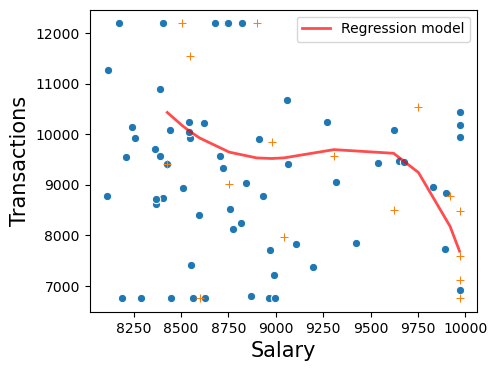

In [105]:
#plotting the data and regression model
plt.subplots(figsize=(5,4), dpi=100)
ax = sns.scatterplot(x="Salary", y="Transactions", data=dfMergedTest, marker='o')
ax2 = sns.scatterplot(x="Salary", y="Transactions", data=dfMergedTrain, marker='+')
ax.set_xlabel('Salary',fontsize=15)
ax2.set_ylabel('Transactions',fontsize=15,rotation=90)
polyFeatures2 = PolynomialFeatures(degree=10)
polyModel2 = linear_model.LinearRegression()
xTrainPoly2 = polyFeatures2.fit_transform(dfMergedTrain["Salary"].to_numpy().reshape(-1,1))
polyModel2.fit(xTrainPoly2, dfMergedTrain["Transactions"])
yTrainPredicted2 = polyModel2.predict(xTrainPoly2)
ax3 = sns.lineplot(y=yTrainPredicted2, x=dfMergedTrain["Salary"], linestyle='-', color="r", label="Regression model", alpha=0.7, lw=2)

4) The model shows how an account could be classified into in debt or not dependent on city demographics and what services it uses. This could allow the bank to classify if a new client is likely to end up in debt or not or if adding a service might move the account into debt. The data used in the model had to be restricted as using the full data set meant that the model never classified as in debt. Reducing the data reduced the accuracy from 0.9 to 0.75. The bank can use this model to help improve their risk assessments.

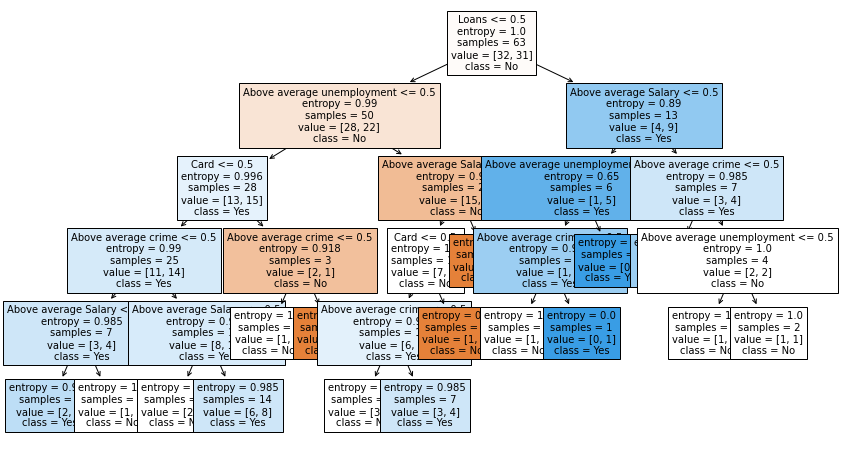

In [106]:
#showing the model
plt.figure(figsize=(14,8))
tree.plot_tree(clf, 
               feature_names=["Card", "Loans", "Above average Salary", "Above average crime", "Above average unemployment"],
               class_names=["No", "Yes"],
               filled=True,
               fontsize=10)
plt.show()

5) The model has grouped the data into 6 clusters. Towards the lower half on the unemployment rate, these are lower on the graph than on the upper half. This suggests areas with a higher unemployment rate take out more loans. This highlights a potential risk for the bank as unemployed clients may be more likely to struggle with repayments. It suggests a need for better financial education in areas with high unemployment to reduce the number of loans needed and protect the bank. The bank could review their risk assessments with this information.

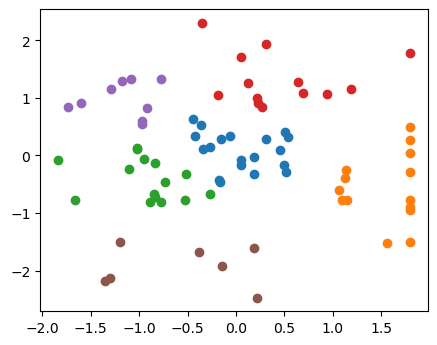

In [107]:
#plotting the clusters
plt.figure(figsize=(5,4), dpi=100)
cluster0 = dfX.query('Cluster == 0')
cluster1= dfX.query('Cluster == 1')
cluster2 = dfX.query('Cluster == 2')
cluster3 = dfX.query('Cluster == 3')
cluster4 = dfX.query('Cluster == 4')
cluster5 = dfX.query('Cluster == 5')
x0 = cluster0['Unemployment95']
x1 = cluster1['Unemployment95']
x2 = cluster2['Unemployment95']
x3 = cluster3['Unemployment95']
x4 = cluster4['Unemployment95']
x5 = cluster5['Unemployment95']
y0 = cluster0['Loans']
y1 = cluster1['Loans']
y2 = cluster2['Loans']
y3 = cluster3['Loans']
y4 = cluster4['Loans']
y5 = cluster5['Loans']
plt.scatter(x0, y0)
plt.scatter(x1, y1)
plt.scatter(x2, y2)
plt.scatter(x3, y3)
plt.scatter(x4, y4)
plt.scatter(x5, y5)
plt.show()


----
----

## Task 5: Conclusion (10 Marks)

Given the insights derived from Tasks 1-4, provide a conclusion that clearly covers the following:
* A summary of the main points;
* A discussion of the significance of your results;
* Any recommendation(s) resulting from your analysis;
* Any overall ethical considerations arising from the data analysis of this business domain.

**World Limit**: 300 words.

**Write your answer here (text cell(s) to be used, as appropriate)**

The models show the bank isn’t currently collecting or utilising data to the best extent. For example, the models suggest most of the city data has little impact on retention. The models show accounts with credit cards have lower balances and cities with higher unemployment rates take out more loans. This is significant as it suggests the risk assessments may be providing these services to people who are less likely to have the means to pay them off. The interest may place them into debt putting the bank at risk of collapse if this happens too much.
To improve and better analyse customer retention, the bank should collect different attributes of data and use the data of clients who have left to analyse why this is happening and prevent it. The bank should improve their risk assessments especially around analysing balances before granting credit cards and provide clients from areas with high unemployment more financial education before granting them a loan. The bank could use model 4 to help classify accounts and clients into risk or not a risk and use this as a tool alongside risk assessments to try to make the fairest yet safest decision.
If the bank wishes to add a branch, it could focus on areas with lower salaries due to their higher number of transactions or cities with higher 1995 crime rates due to their better retention.
The bank deals with the money and finances of its clients giving it an ethical responsibility. It has a responsibility to do everything it can, including using data science, to prevent collapse but also to not use data to inaccurately profile people or unfairly deny them services such as loans or credit cards. Instead, the bank could focus more financial education services to these demographics and areas.

## References

[1] A. Amor and L. Liu. Scikit-learn User Guide [Online]. Available: https://scikit-learn.org/stable/user_guide.html 

[2] L. Igual, S. Seguí, J. Vitrià, E. Puertas, P. Eloi, O. Pujol et al., Introduction to Data Science: A Python Approach to Concepts, Techniques and Applications. Cham: Springer Nature, 2017.

----
----

## Overall Academic Quality (10 Marks)
10 marks are allocated for the clarity and cohesiveness of your answers (both text and code) across all tasks with appropriate, relevant and effective analysis and presentation of the results.

## Deliverables

You should submit the following to the submission point on the teaching portal:

1. the SQLite database produced in Task 2;
2. the completed Jupyter notebook (both .ipynb and HTML files) that also includes the SQL statements (Task 2), the research design and its implementation (Task 3), and the analysis and presentation of your results (Task 4);
3. any figures or diagrams that are included in your answers in the Jupyter notebook.

For each task where text is required, we have provided guidelines above on the suggested word counts. Exceeding the word count will result in any work beyond the word count being disregarded when assessing.